# R054 - Archisha Sinha
## Domain: Reinforcement Learning
## Topic: Value Function Approximation

## **Value Function Approximation**
- Value function approximation is a fundamental concept in reinforcement learning (RL) that enables RL algorithms to scale to large or continuous state and action spaces.
- When it is infeasible to compute or store the exact value of each state (or state-action pair) in large environments, value function approximation provides a way to estimate values using parametric or non-parametric functions.
- State-Value Function (V): Estimates the expected return (cumulative future reward) when starting in state s and following a policy π


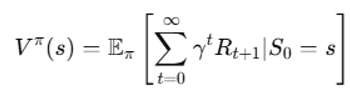

- Action-Value Function (Q): Estimates the expected return starting from state s, taking action a, and thereafter following policy π

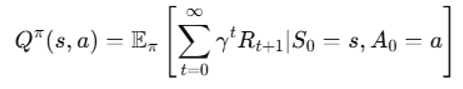

In [1]:
import numpy as np
import random

In [2]:
# Environment settings
num_features = 1  # Single feature for simplicity
num_actions = 2   # Actions: 0 = Left, 1 = Right
goal_state = 10   # Example goal state
start_state = 0   # Starting state
feature_scale = 0.1  # Scaling feature values

In [3]:
# Generate feature vector for each state
def get_features(state):
    return np.array([state * feature_scale])

In [4]:
# Reward function
def get_reward(state):
    return 10 if state == goal_state else -1  # +10 at goal, -1 elsewhere

In [5]:
# Linear Function Approximation with Q-Learning
# Q(s, a) = w.T * f(s, a) where w is the weight vector and f(s, a) is the feature vector for state-action pair

In [6]:
# Hyperparameters
alpha = 0.01       # Learning rate
gamma = 0.9        # Discount factor
epsilon = 0.1      # Exploration rate
episodes = 500     # Number of episodes

In [7]:
# Initialize weights randomly for both actions
weights = np.random.rand(num_features, num_actions)

In [8]:
# Training loop
for episode in range(episodes):
    state = start_state
    while state != goal_state:
        # Feature vector for the current state
        features = get_features(state)

        # ε-greedy action selection
        if random.uniform(0, 1) < epsilon:
            action = random.choice([0, 1])  # Explore
        else:
            q_values = np.dot(features, weights)  # Q-values for both actions
            action = np.argmax(q_values)  # Choose action with max Q-value

        # Simulate environment step
        next_state = state + 1 if action == 1 else state - 1  # Move right or left
        next_state = max(0, min(next_state, goal_state))  # Keep within bounds
        reward = get_reward(next_state)

        # Compute next Q-values and target
        next_features = get_features(next_state)
        next_q_values = np.dot(next_features, weights)
        target = reward + gamma * np.max(next_q_values) if next_state != goal_state else reward

        # Update weights using gradient descent
        td_error = target - np.dot(features, weights[:, action])  # Temporal Difference error
        weights[:, action] += alpha * td_error * features  # Update weights for the taken action

        state = next_state  # Move to the next state

In [9]:
# Display learned weights
print("Learned weights for Q-function approximation:")
print(weights)

Learned weights for Q-function approximation:
[[1.38173863 7.44043765]]
